# Deloitte
## Mission Analytics, Data Exercise



In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from scipy import stats
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

In [148]:
male = pd.read_csv('../data/MA_Exer_PikesPeak_Males.txt', delimiter = '\t')
female = pd.read_csv('../data/MA_Exer_PikesPeak_Females.txt', delimiter = '\t')

# Explore

In [149]:
male

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace
0,1,1/48,9,Joshua Kemei,22.0,Kenya .,28:48,28:47#,4:38
1,2,2/48,35,George Kirwa Misoi,22.0,Kenya .,29:11,29:10#,4:42
2,3,3/48,3,Jacob Frey,24.0,Oakton VA,29:38,29:37#,4:46
3,4,1/96,49,Gurmessa Kumsa,27.0,Oxon Hill MD,29:46,29:46#,4:48
4,5,4/48,31,Mike Baird,24.0,Ardmore PA,30:31,30:30,4:55
...,...,...,...,...,...,...,...,...,...
1260,1261,200/201,2792,Kenneth Winkfield,49.0,Bowie MD,1:35:50,1:30:29,14:34
1261,1262,50/50,63,Thom Hunter,63.0,Gaithersburg MD,1:42:41,1:37:20,15:40
1262,1263,96/96,1547,Nicholas Kelsch,27.0,Gaithersburg MD,1:43:00,1:37:50,15:45
1263,1264,201/201,3330,Cliff Chiet,45.0,Gaithersburg MD,1:44:07,1:38:46,15:54


In [150]:
male.dtypes

Place         int64
Div/Tot      object
Num           int64
Name         object
Ag          float64
Hometown     object
Gun Tim      object
Net Tim      object
Pace         object
dtype: object

In [151]:
female

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace
0,1,1/86,30,Florence Jepkosgei,22.0,Kenya .,32:59,32:58#,5:19
1,2,2/86,8,Eunice Chepkirui,21.0,Kenya .,33:14,33:13#,5:21
2,3,1/247,3200,Elena Orlova,36.0,Gaithersburg MD,34:26,34:25#,5:33
3,4,1/173,2,Susannah Kvasnicka,34.0,Great Falls VA,34:43,34:42#,5:35
4,5,1/142,6,Casey Smith,26.0,Arlington VA,35:04,35:02,5:39
...,...,...,...,...,...,...,...,...,...
1100,1101,247/247,1847,Alicia Maxwell,35.0,Germantown MD,1:43:47,1:40:39,16:12
1101,1102,110/110,2618,Regina Tenali,47.0,Gaithersburg MD,1:50:31,1:45:22,16:58
1102,1103,171/173,986,Nirmala Donley,32.0,Ellicott City M,D 1:50:31,1:45:22,16:58
1103,1104,172/173,1214,Heidi Gertner,34.0,Bethesda MD,1:46:49,1:46:49,17:12


In [152]:
female.dtypes

Place         int64
Div/Tot      object
Num           int64
Name         object
Ag          float64
Hometown     object
Gun Tim      object
Net Tim      object
Pace         object
dtype: object

# Cleanup

In [153]:
### Clean times ###
def drop_func(x):
    keeps = ['1','2','3','4','5','6','7','8','9','0',':']
    for num in x:
        if num not in keeps:
            x = x.replace(num,'')
    return x

### Unifies time ###
def dateparse(x):
    if len(x)==5:
        return f'00:{x}'
    else:
        return f'0{x}'

### Converts string to seconds for ease-of-computation ###
def time_to_seconds(x):
    h,m,s = x.split(':')
    return int(s)+60*(int(m)+60*int(h))
    
### Converts seconds back into 'H:M:S' format ###
def seconds_to_time(x):
    conversion = timedelta(seconds=x)
    return conversion


In [154]:
male['Gun Tim'].str.split(':')
### Get rid of apply ###

0          [28, 48]
1          [29, 11]
2          [29, 38]
3          [29, 46]
4          [30, 31]
           ...     
1260    [1, 35, 50]
1261    [1, 42, 41]
1262    [1, 43, 00]
1263    [1, 44, 07]
1264    [1, 43, 47]
Name: Gun Tim, Length: 1265, dtype: object

In [155]:
male['Gun Tim'] = male['Gun Tim'].apply(drop_func)
male['Gun Tim'] = male['Gun Tim'].apply(dateparse)
male['Gun Tim'] = male['Gun Tim'].apply(time_to_seconds)

male['Net Tim'] = male['Net Tim'].apply(drop_func)
male['Net Tim'] = male['Net Tim'].apply(dateparse)
male['Net Tim'] = male['Net Tim'].apply(time_to_seconds)

female['Gun Tim'] = female['Gun Tim'].apply(drop_func)
female['Gun Tim'] = female['Gun Tim'].apply(dateparse)
female['Gun Tim'] = female['Gun Tim'].apply(time_to_seconds)

female['Net Tim'] = female['Net Tim'].apply(drop_func)
female['Net Tim'] = female['Net Tim'].apply(dateparse)
female['Net Tim'] = female['Net Tim'].apply(time_to_seconds)


In [156]:
### Difference between Gun Time and Net Time ###
male['Delta'] = male['Gun Tim'] - male['Net Tim']
female['Delta'] = female['Gun Tim'] - female['Net Tim']

### Split Div and Tot into different columns ###
def split_divtot(x):
    if type(x) == str:
        return x.split('/')
    else:
        return [np.nan, np.nan]

m_divtot = male['Div/Tot'].apply(split_divtot).to_list()
male[['Div','Tot']] = pd.DataFrame(m_divtot, columns = ['Div','Tot'])

f_divtot = female['Div/Tot'].apply(split_divtot).to_list()
female[['Div','Tot']] = pd.DataFrame(m_divtot, columns = ['Div','Tot'])    

# New Datasets

In [157]:
male

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,Delta,Div,Tot
0,1,1/48,9,Joshua Kemei,22.0,Kenya .,1728,1727,4:38,1,1,48
1,2,2/48,35,George Kirwa Misoi,22.0,Kenya .,1751,1750,4:42,1,2,48
2,3,3/48,3,Jacob Frey,24.0,Oakton VA,1778,1777,4:46,1,3,48
3,4,1/96,49,Gurmessa Kumsa,27.0,Oxon Hill MD,1786,1786,4:48,0,1,96
4,5,4/48,31,Mike Baird,24.0,Ardmore PA,1831,1830,4:55,1,4,48
...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1261,200/201,2792,Kenneth Winkfield,49.0,Bowie MD,5750,5429,14:34,321,200,201
1261,1262,50/50,63,Thom Hunter,63.0,Gaithersburg MD,6161,5840,15:40,321,50,50
1262,1263,96/96,1547,Nicholas Kelsch,27.0,Gaithersburg MD,6180,5870,15:45,310,96,96
1263,1264,201/201,3330,Cliff Chiet,45.0,Gaithersburg MD,6247,5926,15:54,321,201,201


In [158]:
female

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,Delta,Div,Tot
0,1,1/86,30,Florence Jepkosgei,22.0,Kenya .,1979,1978,5:19,1,1,48
1,2,2/86,8,Eunice Chepkirui,21.0,Kenya .,1994,1993,5:21,1,2,48
2,3,1/247,3200,Elena Orlova,36.0,Gaithersburg MD,2066,2065,5:33,1,3,48
3,4,1/173,2,Susannah Kvasnicka,34.0,Great Falls VA,2083,2082,5:35,1,1,96
4,5,1/142,6,Casey Smith,26.0,Arlington VA,2104,2102,5:39,2,4,48
...,...,...,...,...,...,...,...,...,...,...,...,...
1100,1101,247/247,1847,Alicia Maxwell,35.0,Germantown MD,6227,6039,16:12,188,39,50
1101,1102,110/110,2618,Regina Tenali,47.0,Gaithersburg MD,6631,6322,16:58,309,57,73
1102,1103,171/173,986,Nirmala Donley,32.0,Ellicott City M,6631,6322,16:58,309,181,203
1103,1104,172/173,1214,Heidi Gertner,34.0,Bethesda MD,6409,6409,17:12,0,195,214


# General statistics - Mean, Median, Range

In [159]:
print('Male------------')
m_stats = male['Net Tim'].describe().apply(seconds_to_time)
for stat, index in zip(m_stats[1:], m_stats.index[1:]):
    print(f'{index} : {str(stat)[7:]}')
print('Female------------')
f_stats = female['Net Tim'].describe().apply(seconds_to_time)
for stat, index in zip(f_stats[1:], f_stats.index[1:]):
    print(f'{index} : {str(stat)[7:]}')

Male------------
mean : 00:52:07.950988
std : 00:09:41.253684
min : 00:28:47
25% : 00:45:43
50% : 00:51:23
75% : 00:57:49
max : 01:40:38
Female------------
mean : 00:58:28.484163
std : 00:09:53.888621
min : 00:32:58
25% : 00:52:14
50% : 00:57:51
75% : 01:03:37
max : 01:46:49


# Distribution

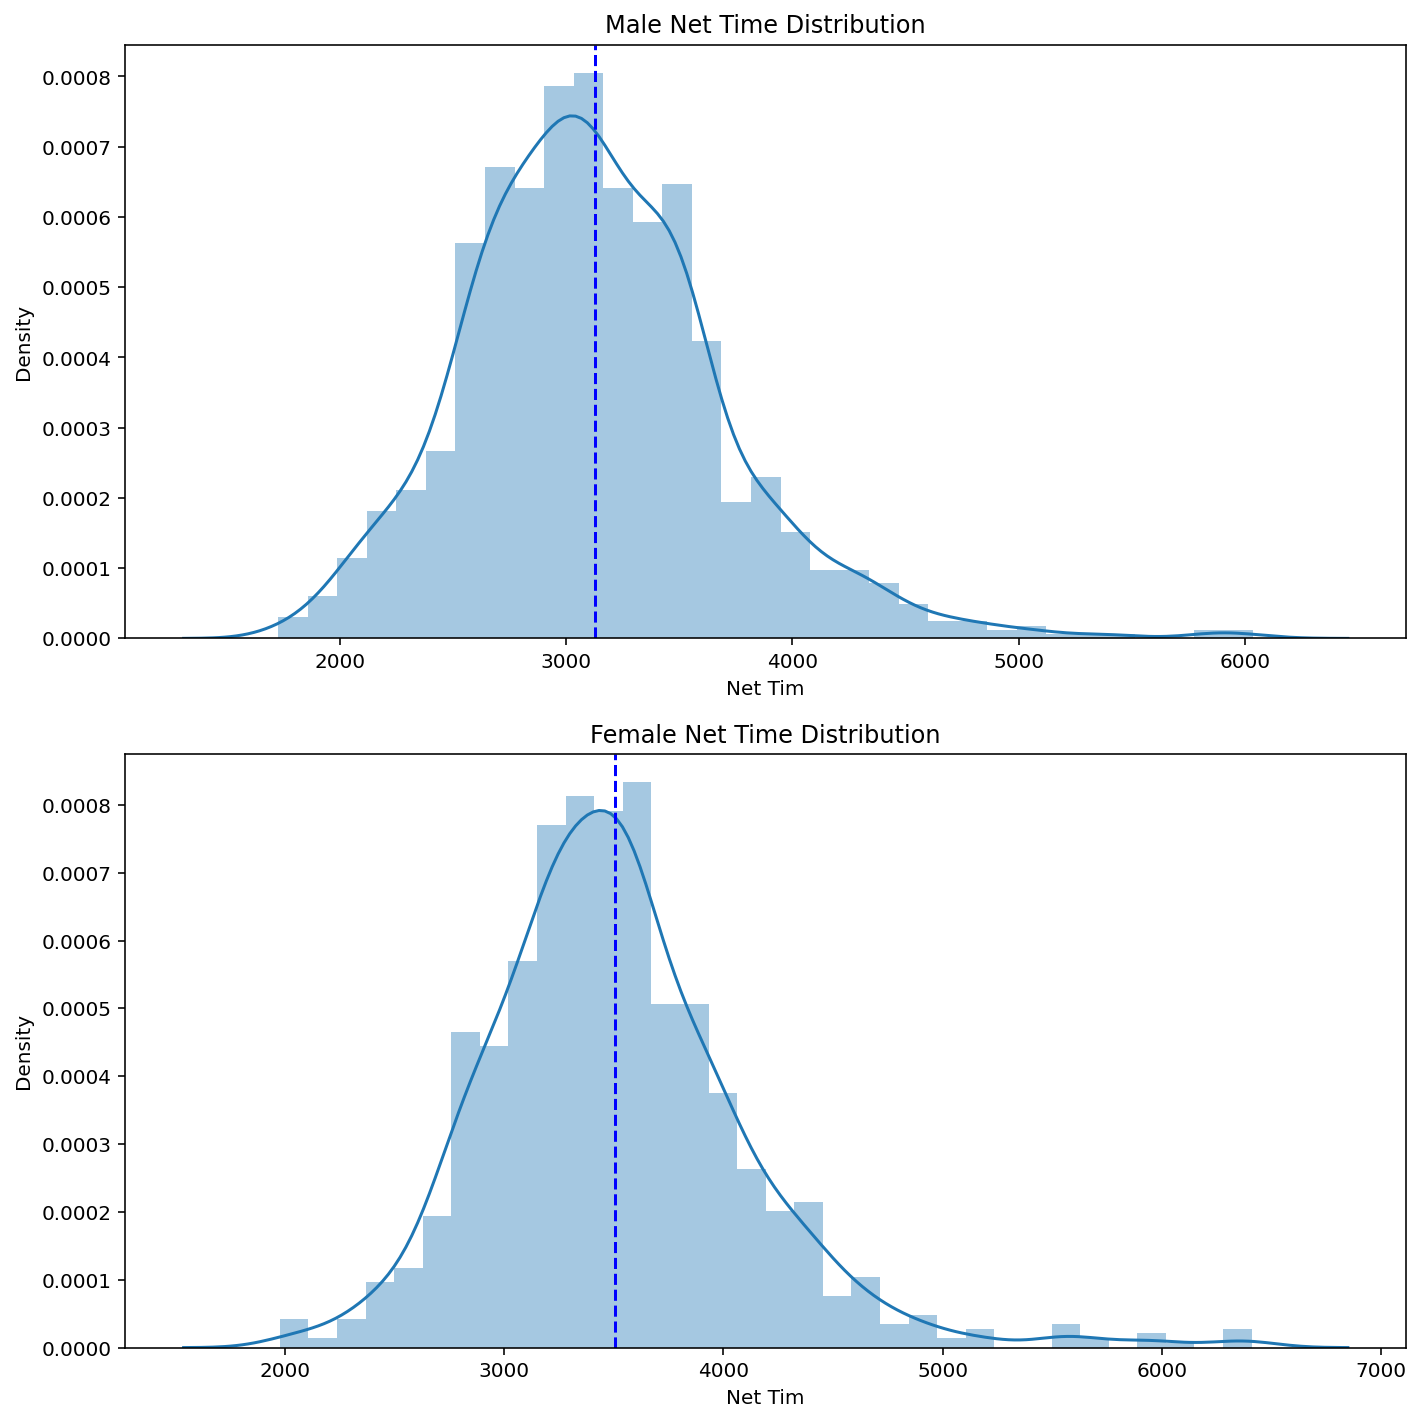

In [160]:
m_mean = np.mean(male['Net Tim'])
f_mean = np.mean(female['Net Tim'])

%matplotlib inline
fig,axs = plt.subplots(2, figsize=(10,10))

sns.distplot(male['Net Tim'], ax = axs[0]);
axs[0].axvline(m_mean,color='b', linestyle='--')
axs[0].set_title('Male Net Time Distribution')

sns.distplot(female['Net Tim'], ax = axs[1]);
axs[1].axvline(f_mean,color='b', linestyle='--')
axs[1].set_title('Female Net Time Distribution')

fig.tight_layout();

# Mode is impractical in a continuous-like time spread

# Difference between Net Time and Gun Time

In [161]:
male['Delta'].describe().round()

count    1265.0
mean      150.0
std        95.0
min         0.0
25%        69.0
50%       185.0
75%       220.0
max       469.0
Name: Delta, dtype: float64

In [162]:
female['Delta'].describe().round()

count    1105.0
mean      195.0
std        89.0
min         0.0
25%       181.0
50%       209.0
75%       239.0
max       560.0
Name: Delta, dtype: float64

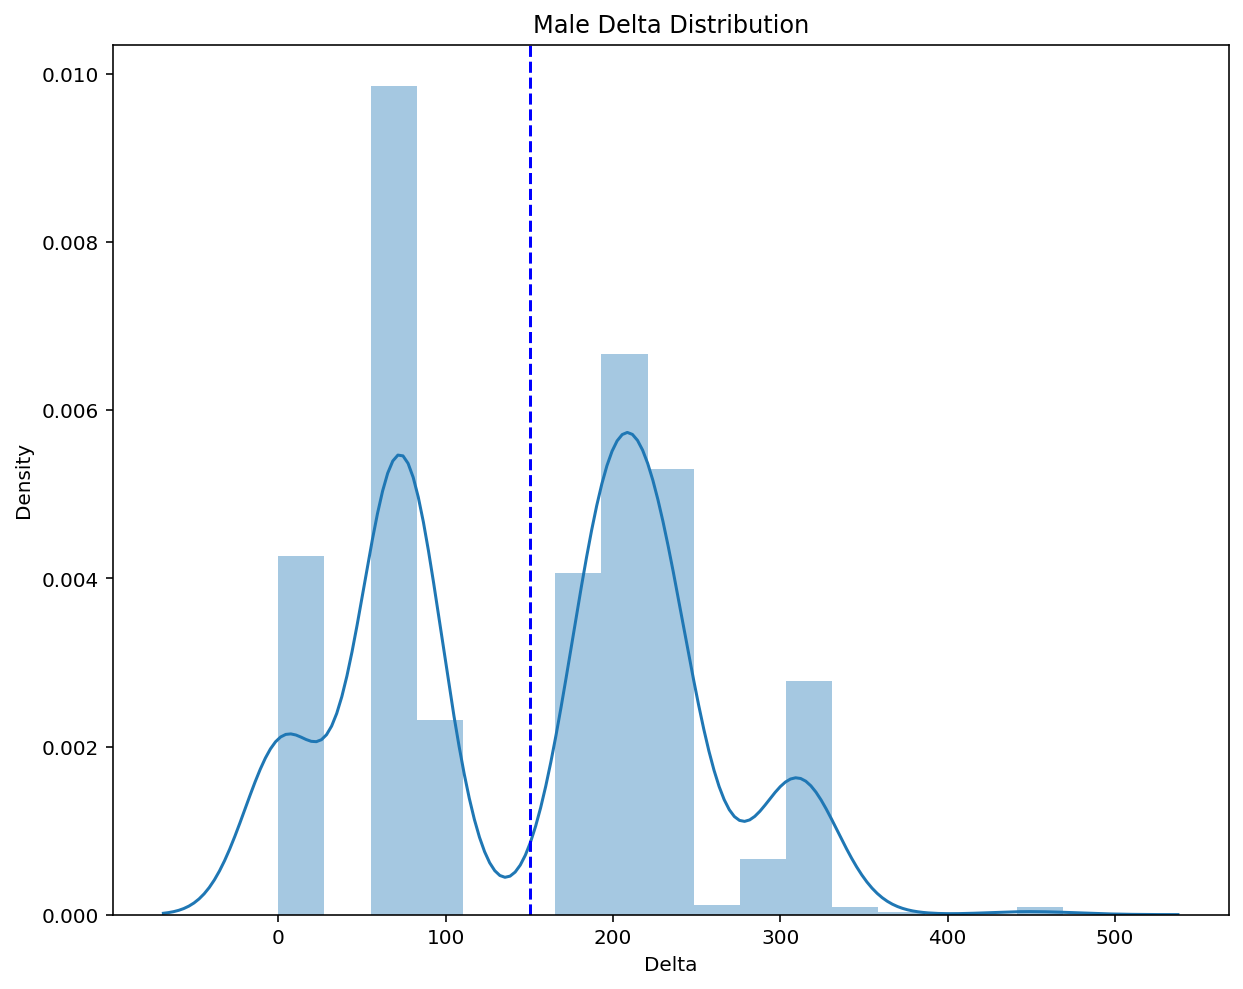

In [200]:
fig,ax = plt.subplots(figsize=(10,8))
sns.distplot(male['Delta'])
ax.axvline(male['Delta'].mean(),color='b', linestyle='--')
ax.set_title('Male Delta Distribution');

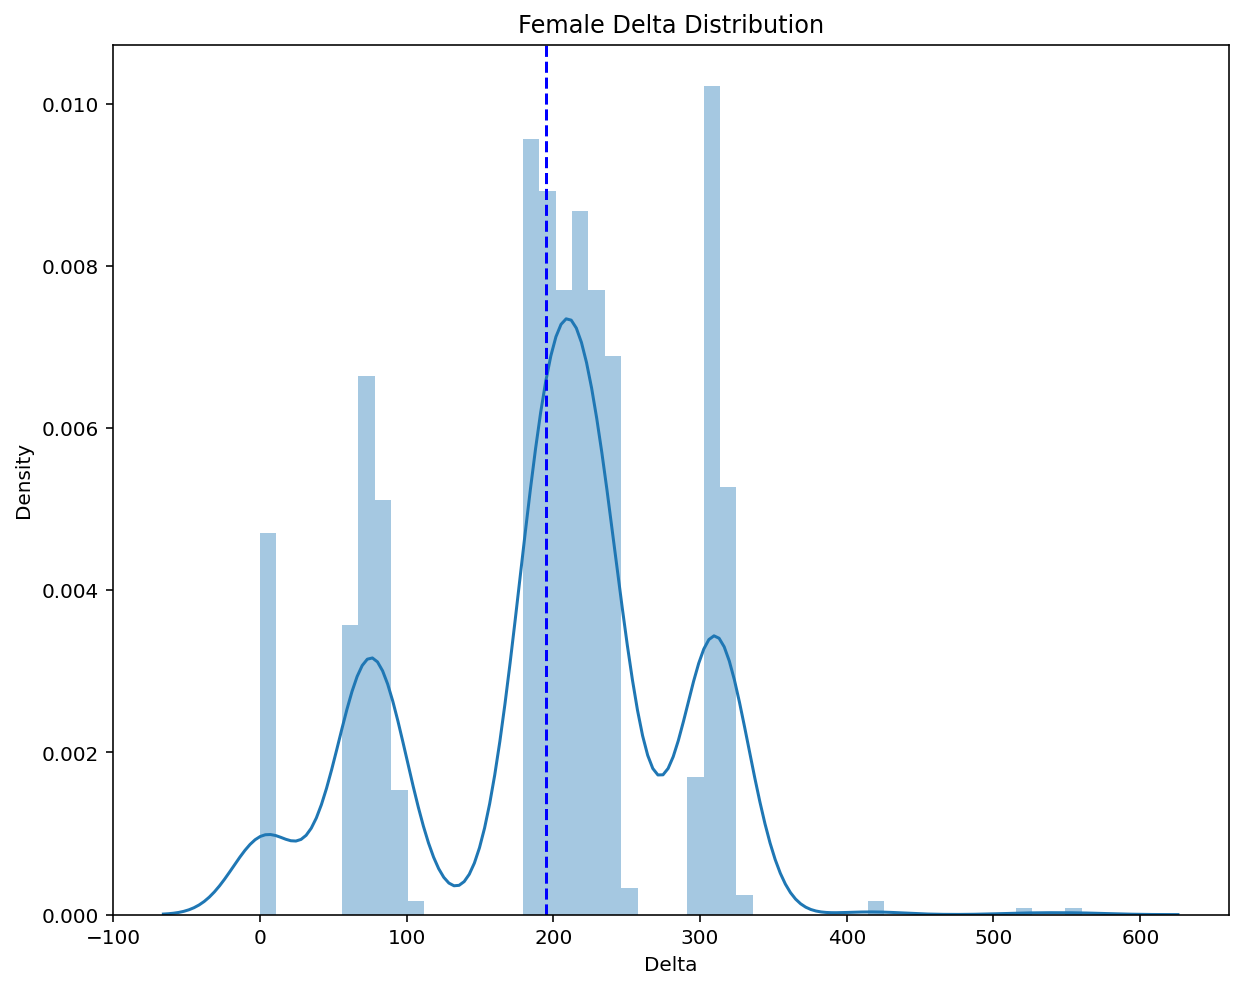

In [199]:
fig,ax = plt.subplots(figsize=(10,8))
sns.distplot(female['Delta'])
ax.axvline(female['Delta'].mean(),color='b', linestyle='--')
ax.set_title('Female Delta Distribution');

## There seems to be 4 distinct distributions that occur in both plots. Around 0, 75, 200, and 300.

In [165]:
female.dropna(inplace=True)
parse = (female['Delta'] >190) & (female['Delta'] <250)
female[parse]

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,Delta,Div,Tot
88,89,15/173,524,Debbie Austin,41.0,Kensington MD,3019,2788,7:29,231,13,214
123,124,17/173,420,Lisa Hoffman,32.0,Rockville MD,3067,2855,7:40,212,19,201
138,139,21/173,2393,Jennifer Schwartz,34.0,Rockville MD,3089,2886,7:45,203,15,96
139,140,33/247,731,Sharon Carlstrom,35.0,Kensington MD,3090,2886,7:45,204,22,214
144,145,16/142,1784,Lisa Magdaleno,27.0,Kensington MD,3106,2906,7:48,200,19,143
...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1080,85/86,2016,Hiva Nesvaderani,23.0,Silver Spring M,5078,4868,13:04,210,173,201
1082,1083,168/173,2219,Althea Raiford,34.0,Silver Spring M,5150,4925,13:13,225,55,73
1083,1084,173/173,2989,Veronica Thurmond,43.0,Silver Spring M,5184,4964,13:19,220,22,28
1095,1096,244/247,3274,Cynthia Wong,36.0,Rockville MD,5874,5670,15:13,204,180,203


In [201]:
female[~parse]

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,Delta,Div,Tot
0,1,1/86,30,Florence Jepkosgei,22.0,Kenya .,1979,1978,5:19,1,1,48
1,2,2/86,8,Eunice Chepkirui,21.0,Kenya .,1994,1993,5:21,1,2,48
2,3,1/247,3200,Elena Orlova,36.0,Gaithersburg MD,2066,2065,5:33,1,3,48
3,4,1/173,2,Susannah Kvasnicka,34.0,Great Falls VA,2083,2082,5:35,1,1,96
4,5,1/142,6,Casey Smith,26.0,Arlington VA,2104,2102,5:39,2,4,48
...,...,...,...,...,...,...,...,...,...,...,...,...
1100,1101,247/247,1847,Alicia Maxwell,35.0,Germantown MD,6227,6039,16:12,188,39,50
1101,1102,110/110,2618,Regina Tenali,47.0,Gaithersburg MD,6631,6322,16:58,309,57,73
1102,1103,171/173,986,Nirmala Donley,32.0,Ellicott City M,6631,6322,16:58,309,181,203
1103,1104,172/173,1214,Heidi Gertner,34.0,Bethesda MD,6409,6409,17:12,0,195,214


### Initial inspection reveals a relationship between Div and Delta columns

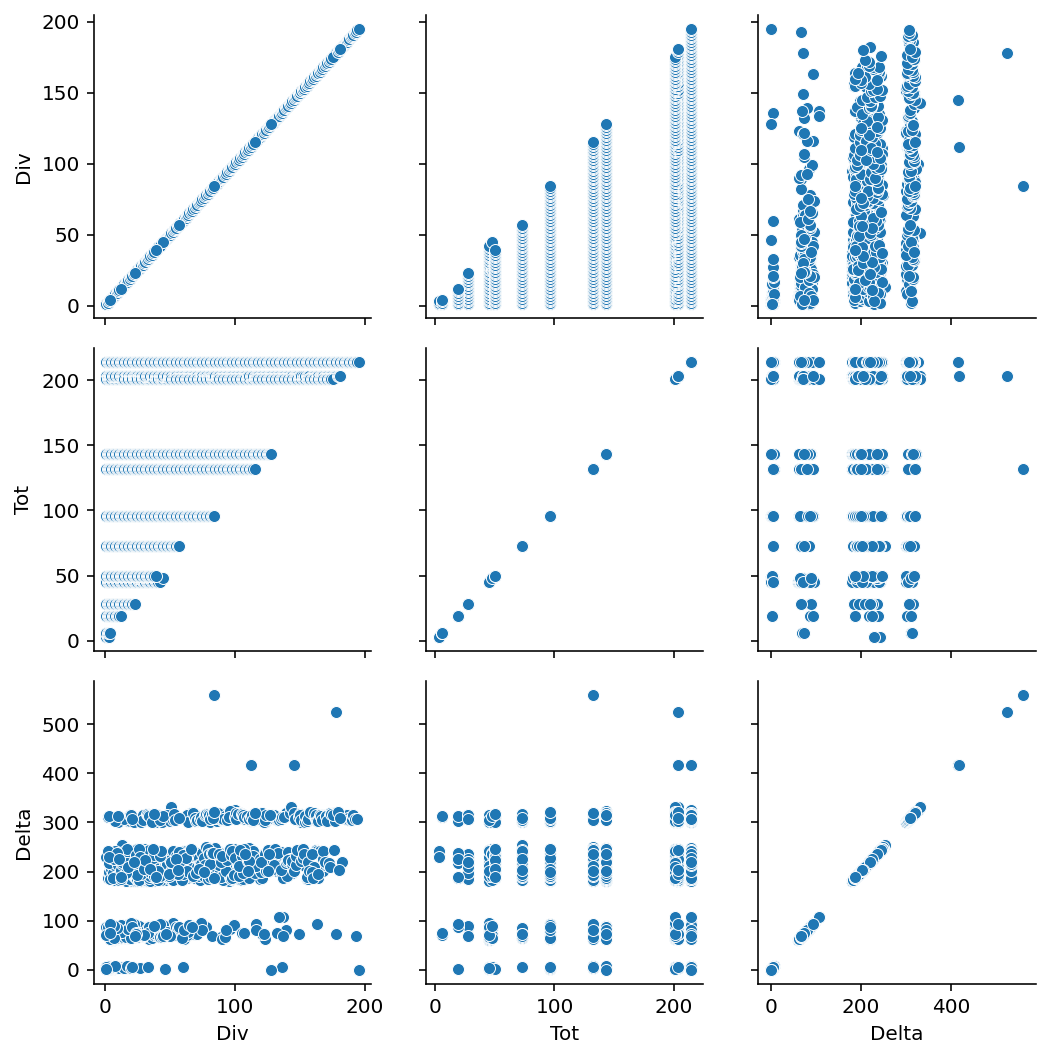

In [178]:
female_correlation = pd.DataFrame([female['Div'].astype(int), female['Tot'].astype(int)]).transpose()
female_correlation['Delta'] = female['Delta']

g = sns.PairGrid(female_correlation)
g.map(sns.scatterplot);


### groupby division for average delta. Graph averages to

### Results are not promising. Something interesting is happening between Delta and 

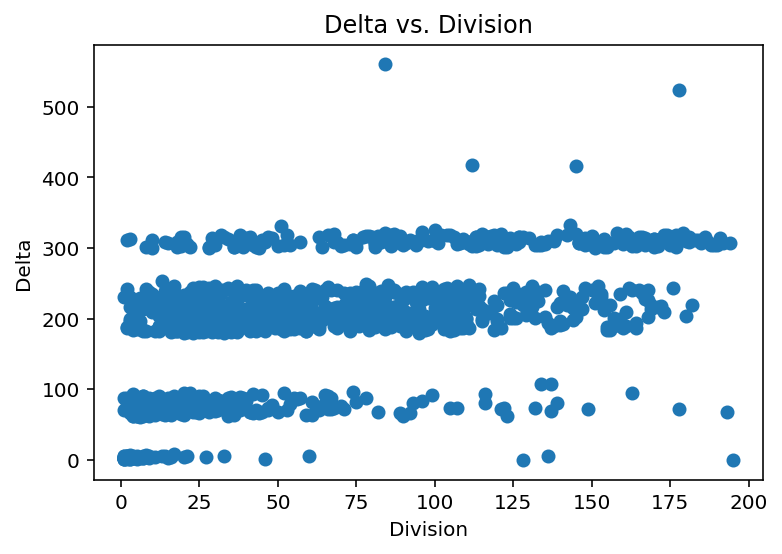

In [179]:
### Zoom in on the specific graph
fig, ax = plt.subplots()
ax.scatter(female_correlation['Div'], female_correlation['Delta'])
ax.set_xlabel('Division')
ax.set_ylabel('Delta')
ax.set_title('Delta vs. Division');

In [188]:
correlation_mean = female_correlation.groupby('Div').mean()
correlation_mean

,Tot,Delta
Div,,
1,90.071429,29.642857
2,90.071429,80.428571
3,90.071429,94.285714
4,96.769231,68.538462
5,104.333333,93.583333
...,...,...
191,214.000000,314.000000
192,214.000000,307.000000
193,214.000000,68.000000


# After finding the mean of each division, the figure shows that there's a strong tendency for higher division participants to have a larger delta

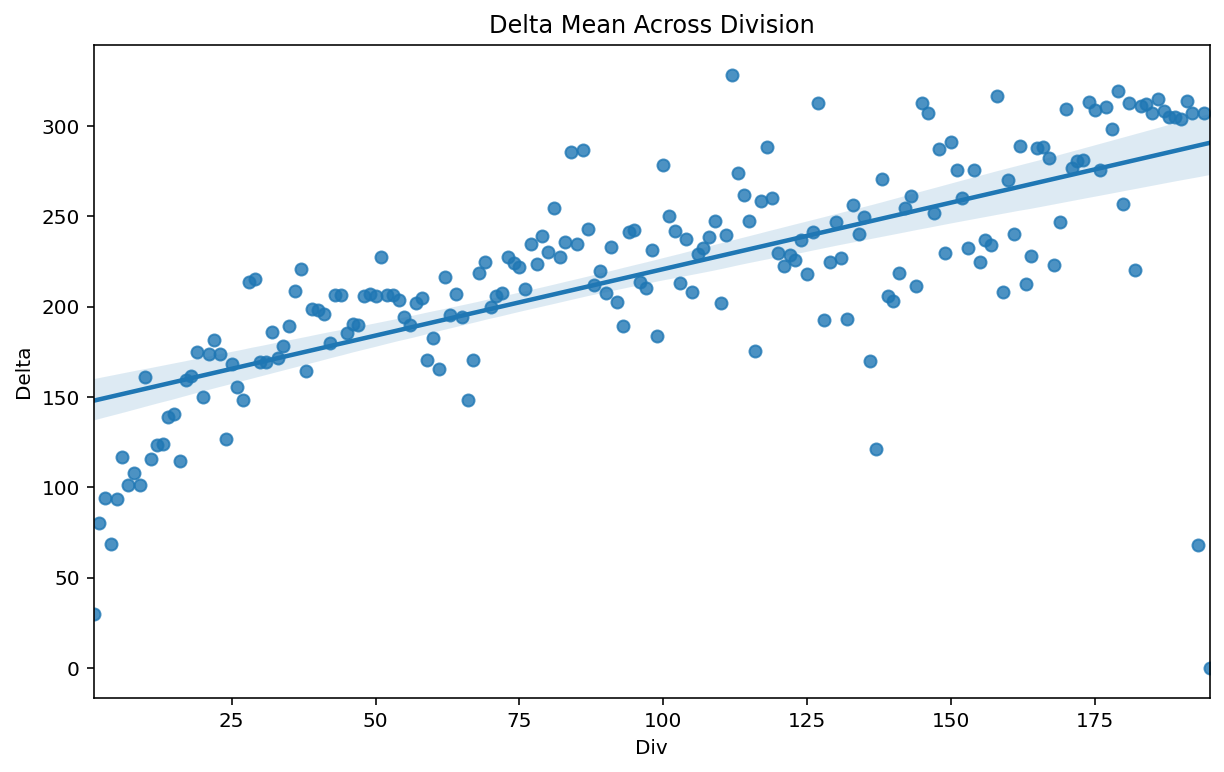

In [198]:
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(correlation_mean.index, correlation_mean['Delta'], ax = ax)
ax.set_title('Delta Mean Across Division');

# Chris Doe vs. Top 10% of His Division


In [115]:
male[male['Name'] == 'Chris Doe']

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,Delta,Div,Tot
534,535,108/214,2869,Chris Doe,44.0,Reson VA,3187,2983,8:00,204,108,214


In [122]:
male[male['Div'] == '108']

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,Delta,Div,Tot
534,535,108/214,2869,Chris Doe,44.0,Reson VA,3187,2983,8:00,204,108,214
688,689,108/203,1926,Rachel Miller,36.0,Gaithersburg MD,3335,3133,8:25,202,108,203
700,701,108/201,1208,Barry Geisler,47.0,Potomac MD,3361,3152,8:28,209,108,201
930,931,108/143,684,Sam Brown,31.0,Laurel MD,3679,3436,9:13,243,108,143
1052,1053,108/132,1534,Andrew Katz,53.0,Rockville MD,3896,3589,9:38,307,108,132


### The question is misleading because Chris Doe IS the best of his division. Additionally, there are only 5 data points in the division. I suspect that there are errors in data entry since divisions are seperated by geneder and age. The age range of Division 108 is between 31 and 53, outside of the documented 10-year splits. 

# Chris Doe vs. Top 10% Overall

In [64]:
chris_doe = int(male[male['Name'] == 'Chris Doe']['Net Tim'].values[0])
ten_percent = int(male['Net Tim'].quantile(.1))
difference = int( chris_doe - ten_percent)

In [65]:
print(f'Chris Doe : {str(seconds_to_time(chris_doe))} \n90th percentile : {str(seconds_to_time(ten_percent))} \nDifference : {str(seconds_to_time(difference))}')

Chris Doe : 0:49:43 
90th percentile : 0:41:04 
Difference : 0:08:39


### Chris is 8 mins and 39 seconds slower than the top 10%

# Division Times

In [66]:
male_divs = male.groupby('Div')
means = pd.DataFrame(male_divs['Net Tim'].mean())

In [67]:
means.reset_index(inplace=True)
means['Div'] = means['Div'].astype(int)
means = means.set_index('Div').sort_index()

In [68]:
means

,Net Tim
Div,
1,2338.333333
2,2482.133333
3,2410.857143
4,2392.615385
5,2509.461538
...,...
210,4318.000000
211,4340.000000
212,4620.000000


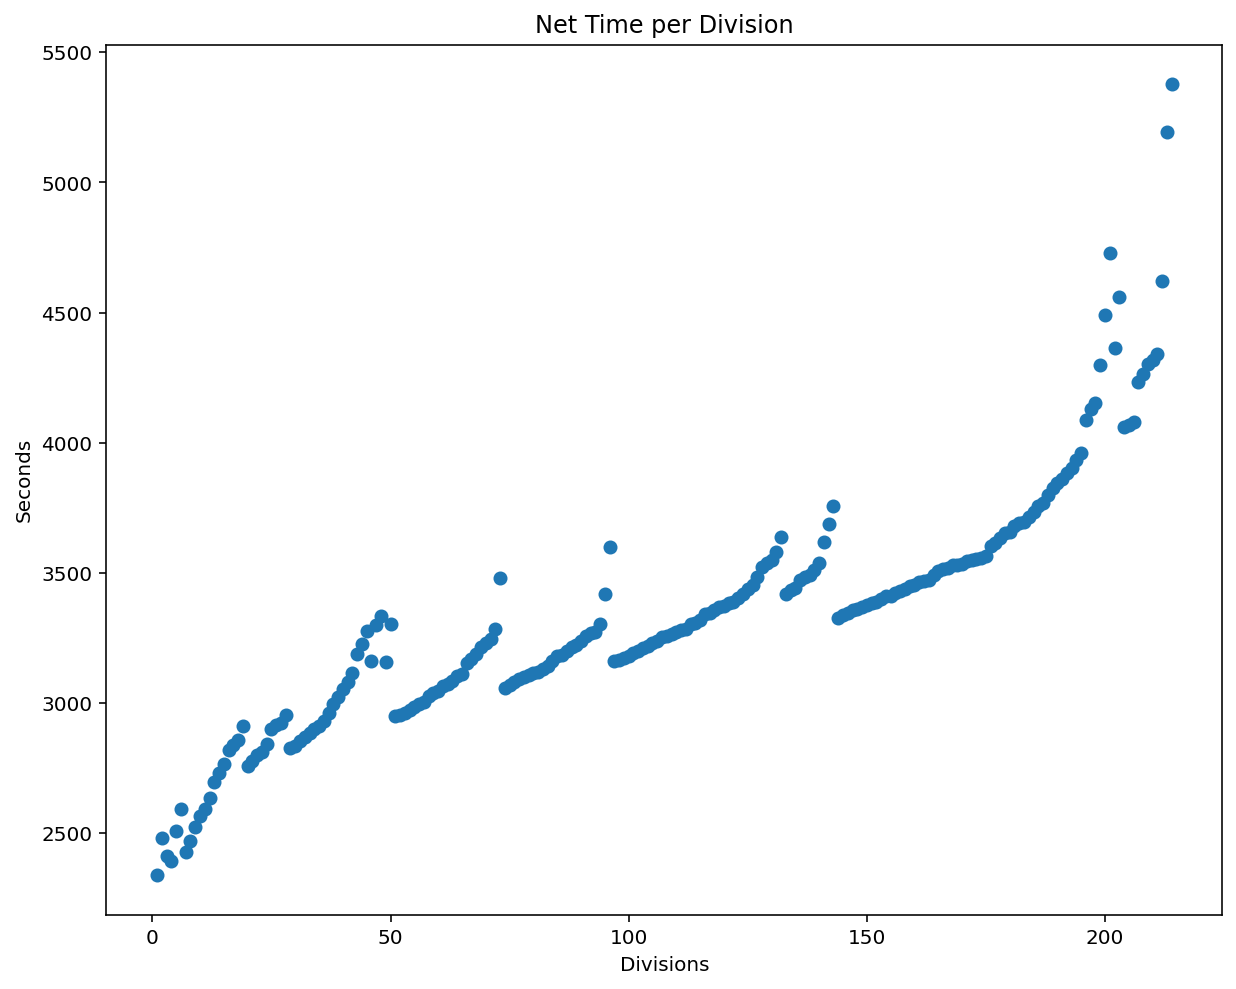

In [69]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(means.index, means['Net Tim'])
ax.set_xlabel('Divisions')
ax.set_ylabel('Seconds')
ax.set_title('Net Time per Division');

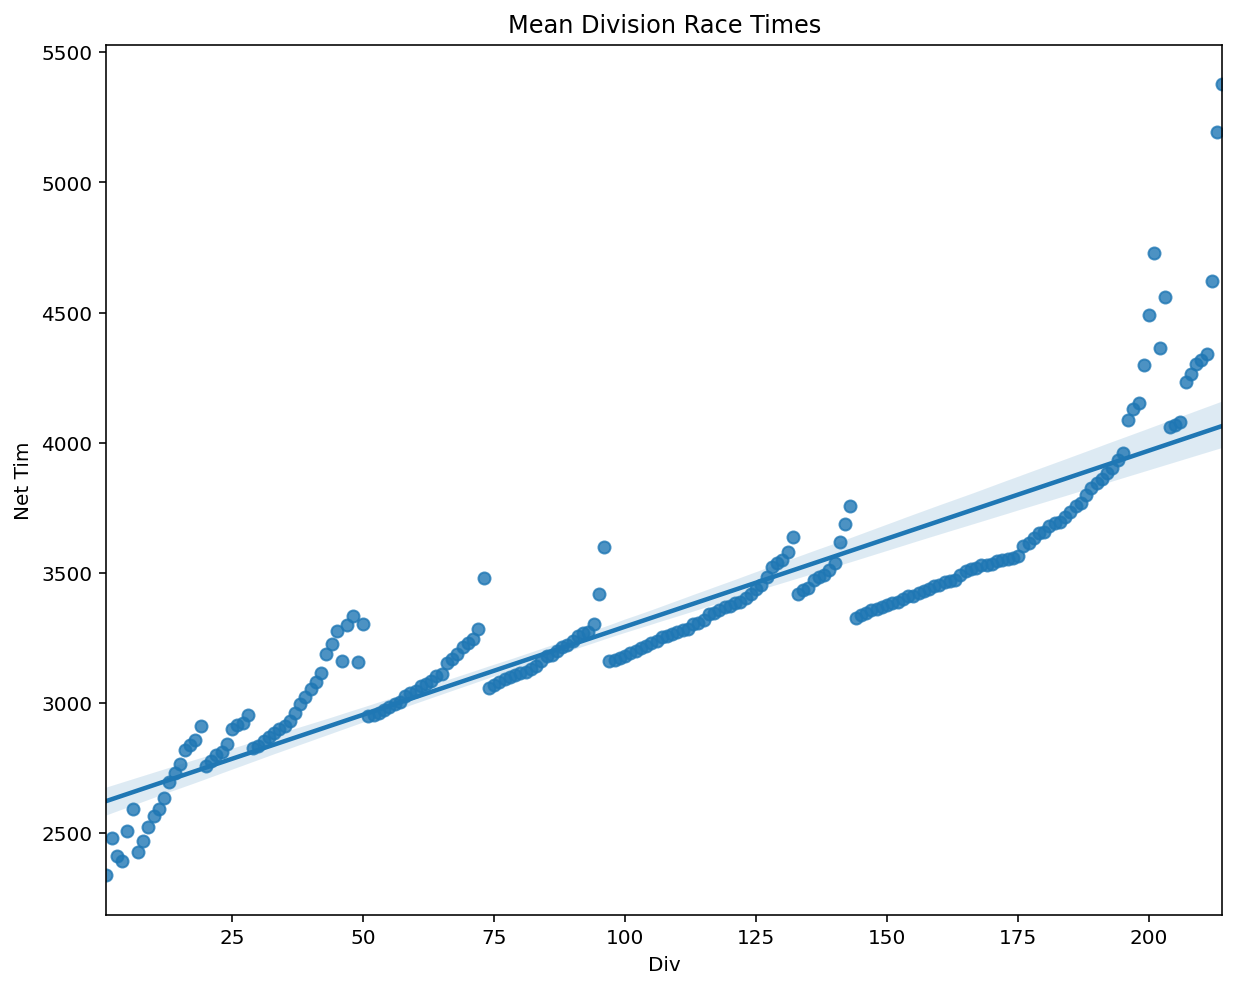

In [203]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(means.index, means['Net Tim'])
ax.set_title('Mean Division Race Times');

In [204]:
import statsmodels.api as sm
lr = sm.OLS(means['Net Tim'], means.index)
reg = lr.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Net Tim   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                              1179.
Date:                Tue, 18 May 2021   Prob (F-statistic):                    8.86e-89
Time:                        20:08:08   Log-Likelihood:                         -1841.5
No. Observations:                 214   AIC:                                      3685.
Df Residuals:                     213   BIC:                                      3688.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            25.0624      0.730     34.337      0.000      23.624      26.501
==============================================================================
Omnibus:                      500.056   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.558
Skew:                           0.071   Prob(JB):                     0.000154
Kurtosis:                       1.604   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""